##

In [1]:
import pandas as pd
import numpy.testing
from numpy.testing import assert_allclose
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from pathlib import  Path
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in
hallo


/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/notebooks/bill_collins/attribution_1750_2019_v2_smb.py:92: RuntimeWarning: invalid value encountered in true_divide
  ch4_sd = (ch4-ch4_2014)*lifech4_sd/lifech4


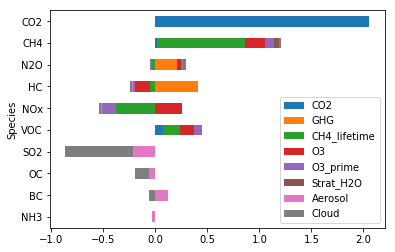

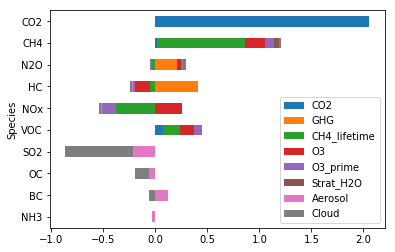

[2.05755418 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.30980392156862746, 0.3215686274509804, 0.7176470588235294)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


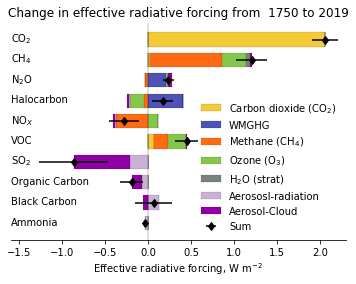

In [2]:
import attribution_1750_2019_v2_smb

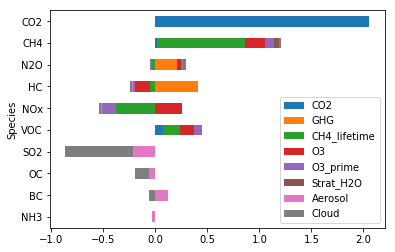

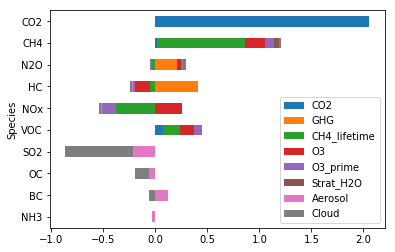

[2.05755418 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.30980392156862746, 0.3215686274509804, 0.7176470588235294)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


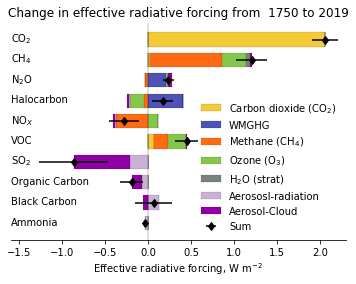

In [3]:
table, table_sd = attribution_1750_2019_v2_smb.main()

In [6]:
table.to_csv('table_mean_smb_orignames.csv')

In [4]:
from ar6_ch6_rcmipfigs.utils.plot import get_chem_col

In [4]:
varn = ['co2','WMGHG','ch4','o3','H2O_strat','ari','aci']
var_dir = ['CO2','GHG','CH4_lifetime','O3','Strat_H2O','Aerosol','Cloud']

In [5]:
cols = [get_chem_col(var) for var in varn]

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.30980392156862746, 0.3215686274509804, 0.7176470588235294)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
o3_sum = table['O3']+table['O3_prime']
tab2 = table.copy(deep=True).drop(['O3','O3_prime','Total'], axis=1)
tab2['O3'] = o3_sum

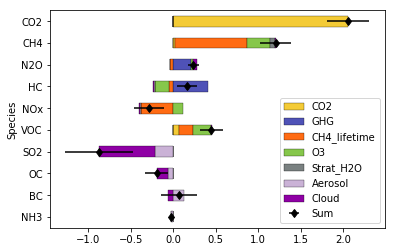

In [7]:
tab2.loc[::-1,var_dir].plot.barh(stacked=True, color=cols, linewidth=.3, edgecolor='k',
                                )
tot = table['Total'][::-1]
xerr = table_sd['Total_sd'][::-1]
y = np.arange(len(tot))
plt.errorbar(tot, y,xerr=xerr,marker='d', linestyle='None', color='k', label='Sum', )
plt.legend()

## Uncertainty:

We have the standard deviation, but would like the use the standard error of the mean AND we would like to calculate the 5-95th percentile. 

We have the standard deviation (as far as I can tell, not the unbiased one)

$\sigma=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n}}$

The unbiased estimator would be:

$s=\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}} = \sigma \cdot \sqrt{ \frac{n}{n-1}}$

The standard error is:

$SE = \frac{\sigma}{n}$

Finally, we want 5-95th percentile. Assuming normal distribution, this amounts to multiplying the standard error by 1.645

In [8]:
std_2_95th = 1.645

In [14]:
import pandas as pd
num_mod_lab = 'Number of models (Thornhill 2020)'
thornhill = pd.read_csv('table2_thornhill2020.csv', index_col=0)
thornhill.index = thornhill.index.rename('Species')
thornhill

,n,Number of models (Thornhill 2020)
Species,,
BC,6,7
CH4,7,8
N2O,4,5
HC,4,6
NOx,4,5
VOC,4,5
SO2,5,6
OC,5,6
NH3,2,2


![](thornhill.jpg)

In [11]:
sd_tot = table_sd['Total_sd']
df_err= pd.DataFrame(sd_tot.rename('std'))
df_err['SE'] = df_err

In [28]:
df_err['SE'] = df_err['std']/np.sqrt(thornhill[num_mod_lab])
df_err['95-50_SE'] = df_err['SE']*std_2_95th
df_err.loc['CO2','95-50_SE']= df_err.loc['CO2','std']
df_err

,std,SE,95-50,95-50_SE
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.182717,0.064600,0.106267,0.106267
N2O,0.061899,0.027682,0.045537,0.045537
HC,0.117053,0.047787,0.078609,0.078609
NOx,0.173085,0.077406,0.127333,0.127333
VOC,0.137949,0.061693,0.101484,0.101484
SO2,0.401442,0.163888,0.269596,0.269596
OC,0.134342,0.054845,0.090220,0.090220
BC,0.213043,0.080523,0.132460,0.132460


In [29]:
df_err['95-50'] = df_err['std']*std_2_95th
df_err.loc['CO2','95-50']= df_err.loc['CO2','std']
df_err

,std,SE,95-50,95-50_SE
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.182717,0.064600,0.300569,0.106267
N2O,0.061899,0.027682,0.101825,0.045537
HC,0.117053,0.047787,0.192552,0.078609
NOx,0.173085,0.077406,0.284725,0.127333
VOC,0.137949,0.061693,0.226926,0.101484
SO2,0.401442,0.163888,0.660372,0.269596
OC,0.134342,0.054845,0.220992,0.090220
BC,0.213043,0.080523,0.350455,0.132460


In [65]:
rename_dic_cat = {
    'CO2':'Carbon dioxide (CO$_2$)',
    'GHG':'WMGHG',
    'CH4_lifetime': 'Methane (CH$_4$)',
    'O3': 'Ozone (O$_3$)',
    'Strat_H2O':'H$_2$O (strat)',
    'Aerosol':'Aerosol-radiation',
    'Cloud':'Aerosol-cloud'
}
rename_dic_cols ={
    'CO2':'CO$_2$',
    'CH4':'CH$_4$',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',
    'NOx':'NO$_x$',
    'VOC':'VOC + CO',
    'SO2':'SO$_2$',
    'OC':'Organic carbon',
    'BC':'Black carbon',
    'NH3':'Ammonia'
}
tab_plt = tab2.loc[::-1,var_dir].rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt

,Carbon dioxide (CO$_2$),WMGHG,Methane (CH$_4$),Ozone (O$_3$),H$_2$O (strat),Aerosol-radiation,Aerosol-cloud
Species,,,,,,,
Ammonia,0.000000,0.00,0.000000,0.000000,0.00,-0.030954,0.000000
Black carbon,0.000000,0.00,0.000000,0.000000,0.00,0.123707,-0.058248
Organic carbon,0.000000,0.00,0.000000,0.000000,0.00,-0.066129,-0.127318
SO$_2$,0.000000,0.00,0.000000,0.000000,0.00,-0.214702,-0.654434
VOC + CO,0.069491,0.00,0.162462,0.210860,0.00,-0.003344,0.008500
NO$_x$,0.000000,0.00,-0.380025,0.120237,0.00,-0.011912,-0.013833
CFC + HCFC,0.000053,0.41,-0.050927,-0.164586,0.00,-0.010501,-0.016667
N$_2$O,0.000000,0.21,-0.035967,0.024311,0.00,-0.002717,0.040667
CH$_4$,0.017549,0.00,0.844457,0.279179,0.05,-0.003448,0.017625


In [95]:
tab_plt.sum()

Carbon dioxide (CO$_2$)    2.144647
WMGHG                      0.620000
Methane (CH$_4$)           0.540000
Ozone (O$_3$)              0.470000
H$_2$O (strat)             0.050000
Aerosol-radiation         -0.220000
Aerosol-cloud             -0.803708
dtype: float64

In [96]:
tab_plt.sum(axis=1)

Species
Ammonia          -0.030954
Black carbon      0.065459
Organic carbon   -0.193447
SO$_2$           -0.869136
VOC + CO          0.447969
NO$_x$           -0.285533
CFC + HCFC        0.167372
N$_2$O            0.236293
CH$_4$            1.205361
CO$_2$            2.057554
dtype: float64

In [92]:
fn_sd = 'table_uncertainties_smb.csv'
fn_mean = 'table_mean_smb.csv'

In [94]:
df_err

,std,SE,95-50,95-50_SE
Species,,,,
CO$_2$,0.246907,NaN,0.246907,0.246907
CH$_4$,0.182717,0.064600,0.300569,0.106267
N$_2$O,0.061899,0.027682,0.101825,0.045537
CFC + HCFC,0.117053,0.047787,0.192552,0.078609
NO$_x$,0.173085,0.077406,0.284725,0.127333
VOC + CO,0.137949,0.061693,0.226926,0.101484
SO$_2$,0.401442,0.163888,0.660372,0.269596
Organic carbon,0.134342,0.054845,0.220992,0.090220
Black carbon,0.213043,0.080523,0.350455,0.132460


In [93]:
df_err = df_err.rename(rename_dic_cols, axis=0)
df_err.to_csv(fn_sd)
tab_plt.to_csv(fn_mean)

In [66]:
width = 0.7
kwargs = {'linewidth':.1,'edgecolor':'k'}

In [67]:
import seaborn as sns

In [68]:
ybar = np.arange(len(tab_plt)+1)#, -1)
ybar

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

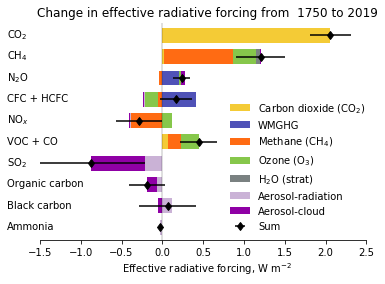

In [77]:
fig, ax = plt.subplots()#figsize=[10,10])


tab_plt.plot.barh(stacked=True, color=cols, linewidth=.0, edgecolor='k',ax=ax, width=width)
tot = table['Total'][::-1]
xerr = df_err['95-50'][::-1]
y = np.arange(len(tot))
plt.errorbar(tot, y,xerr=xerr,marker='d', linestyle='None', color='k', label='Sum', )
plt.legend(frameon=False)
ax.set_ylabel('')
sns.despine()





for lab, y in zip(tab_plt.index, ybar):
        #plt.text(-1.55, ybar[i], species[i],  ha='left')#, va='left')
    plt.text(-1.9, y-0.1, lab,  ha='left')#, va='left')
plt.title('Change in effective radiative forcing from  1750 to 2019')
plt.xlabel(r'Effective radiative forcing, W m$^{-2}$')
plt.xlim(-1.5, 2.6)
    #plt.xlim(-1.6, 2.0)
sns.despine(fig, left=True, trim=True)
plt.legend(loc='lower right', frameon=False)
plt.axvline(x=0., color='k', linewidth=0.25)
fn = 'attribution_1750_2019_5-95th.png'
fp = RESULTS_DIR /'figures_historic_attribution'/fn
fp.parent.mkdir(parents=True, exist_ok=True)
ax.set_yticks([])

plt.savefig(fp, dpi=300)
plt.savefig(fp.with_suffix('.pdf'), dpi=300)
plt.show()

Will combine all uncertaintes